# NO PUBCHEM

In [1]:
import pandas as pd
import numpy as np

db = pd.read_csv('lc_db_processed.csv').drop(columns = ['Unnamed: 0', 'fish'])
db['conc1_mean'] = np.where(db['conc1_mean'] > 1, 0,1)

## Utilizzo tutte le caratteristiche con MinMax solo su train set

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from scipy.stats import sem
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

lst = db.select_dtypes('object').columns.tolist()
lst.remove('smiles')
lst.remove('pubchem2d')
lst.remove('test_cas')

encoder = OneHotEncoder(sparse = False)
encoder.fit(db[lst])
X = pd.concat([db.drop(columns = lst), pd.DataFrame(encoder.transform(db[lst]),
                                                    columns = encoder.get_feature_names(lst))], axis = 1)

accs = []
sens = []
specs = []

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(X.drop(columns = ['test_cas', 'conc1_mean','smiles','pubchem2d']),
                                                    db['conc1_mean'], test_size = 0.33)

    minmax = MinMaxScaler()
    minmax.fit(X_train[numerical])
    new_train = X_train.copy()
    new_train.loc[:, numerical] = minmax.transform(X_train[numerical])
    
    new_test = X_test.copy()
    new_test.loc[:, numerical] = minmax.transform(X_test[numerical])
    
    
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(new_train, y_train) ########################## cambiare se faccio minmax
    y_pred = knn.predict(new_test)
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    specs.append(tn/(tn+fp))
    
print('Accuracy: \t', np.mean(accs), 'se:', sem(accs))
print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
print('Specificity:', np.mean(specs), 'se:', sem(specs))

Accuracy: 	 0.7186211049224747 se: 0.0007194221373083567
Sensitivity: 0.6298330975522243 se: 0.004245959606335624
Specificity: 0.7735177528428461 se: 0.0018142058199968204


## Senza MinMax

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from scipy.stats import sem
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

lst = db.select_dtypes('object').columns.tolist()
lst.remove('smiles')
lst.remove('pubchem2d')
lst.remove('test_cas')

encoder = OneHotEncoder(sparse = False)
encoder.fit(db[lst])
X = pd.concat([db.drop(columns = lst), pd.DataFrame(encoder.transform(db[lst]),
                                                    columns = encoder.get_feature_names(lst))], axis = 1)

accs = []
sens = []
specs = []

for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(X.drop(columns = ['test_cas', 'conc1_mean','smiles','pubchem2d']),
                                                    db['conc1_mean'], test_size = 0.33)
    
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    specs.append(tn/(tn+fp))
    
print('Accuracy: \t', np.mean(accs), 'se:', sem(accs))
print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
print('Specificity:', np.mean(specs), 'se:', sem(specs))

Accuracy: 0.8465151287069096 se: 0.001652179301332399
Sensitivity: 0.8048755398420662 se: 0.00263331111249059
Specificity: 0.8723533629717203 se: 0.002573035748697218


## K = 1,3,5,7,9,21,31

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from scipy.stats import sem
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

lst = db.select_dtypes('object').columns.tolist()
lst.remove('smiles')
lst.remove('pubchem2d')
lst.remove('test_cas')

encoder = OneHotEncoder(sparse = False)
encoder.fit(db[lst])
X = pd.concat([db.drop(columns = lst), pd.DataFrame(encoder.transform(db[lst]),
                                                    columns = encoder.get_feature_names(lst))], axis = 1)
for k in [1,3,5,7,9,21,31]:
    accs = []
    sens = []
    specs = []
    for i in range(0,5):
        X_train, X_test, y_train, y_test = train_test_split(
            X.drop(columns = ['test_cas', 'conc1_mean','smiles','pubchem2d']), db['conc1_mean'], test_size = 0.33)

        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accs.append(accuracy_score(y_test, y_pred))
        sens.append(recall_score(y_test, y_pred))

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        specs.append(tn/(tn+fp))
    print('K=',k)
    print('Accuracy:', np.mean(accs), 'se:', sem(accs))
    print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
    print('Specificity:', np.mean(specs), 'se:', sem(specs))

K= 1
Accuracy: 	 0.8437452958000902 se: 0.002474906352566894
Sensitivity: 0.7991608232058054 se: 0.002888160628217317
Specificity: 0.8713235663004812 se: 0.003034667735990581
K= 3
Accuracy: 	 0.8530483215414723 se: 0.0020204161286810456
Sensitivity: 0.7954936077048934 se: 0.002947714417339753
Specificity: 0.888039802448958 se: 0.002703594332515464
K= 5
Accuracy: 	 0.8487731446635557 se: 0.001626607576003621
Sensitivity: 0.7809563905387625 se: 0.001908825617360951
Specificity: 0.8905722397684853 se: 0.0025376799483555505
K= 7
Accuracy: 	 0.8438055095589343 se: 0.0017751573708875948
Sensitivity: 0.7660310936058166 se: 0.003059176932038515
Specificity: 0.8918709240779028 se: 0.0016467215507962871
K= 9
Accuracy: 	 0.8382658437452959 se: 0.0007902697424902444
Sensitivity: 0.7648980256053646 se: 0.0015650145751834655
Specificity: 0.8841483175905033 se: 0.0017190440536746178
K= 21
Accuracy: 	 0.8154448291434593 se: 0.0007719934610843199
Sensitivity: 0.7184053393745412 se: 0.001695682967899962

# Con MinMax

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from scipy.stats import sem
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

lst = db.select_dtypes('object').columns.tolist()
lst.remove('smiles')
lst.remove('pubchem2d')
lst.remove('test_cas')

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

encoder = OneHotEncoder(sparse = False)
encoder.fit(db[lst])
X = pd.concat([db.drop(columns = lst), pd.DataFrame(encoder.transform(db[lst]),
                                                    columns = encoder.get_feature_names(lst))], axis = 1)
for k in [1,3,5,7,9,21,31]:
    accs = []
    sens = []
    specs = []
    for i in range(0,5):
        X_train, X_test, y_train, y_test = train_test_split(
            X.drop(columns = ['test_cas', 'conc1_mean','smiles','pubchem2d']), db['conc1_mean'], test_size = 0.33)
        
        minmax = MinMaxScaler()
        minmax.fit(X_train[numerical])
        
        new_train = X_train.copy()
        new_train.loc[:, numerical] = minmax.transform(X_train[numerical])

        new_test = X_test.copy()
        new_test.loc[:, numerical] = minmax.transform(X_test[numerical])
        
        
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(new_train, y_train)
        y_pred = knn.predict(new_test)
        accs.append(accuracy_score(y_test, y_pred))
        sens.append(recall_score(y_test, y_pred))

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        specs.append(tn/(tn+fp))
    print('K=',k)
    print('Accuracy:', np.mean(accs), 'se:', sem(accs))
    print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
    print('Specificity:', np.mean(specs), 'se:', sem(specs))

K= 1
Accuracy: 0.7187415324401626 se: 0.002063804075461544
Sensitivity: 0.6216901863785576 se: 0.005107220834440396
Specificity: 0.7790155420184938 se: 0.0035716763659116683
K= 3
Accuracy: 0.7328315520096342 se: 0.003184220622518321
Sensitivity: 0.6076245019215643 se: 0.003943321328589471
Specificity: 0.8100852462408576 se: 0.002670491179487638
K= 5
Accuracy: 0.7335240102363391 se: 0.0013074846154212632
Sensitivity: 0.589983324067384 se: 0.004434690206336319
Specificity: 0.8229517889748669 se: 0.0038627324484566397
K= 7
Accuracy: 0.7403582718651214 se: 0.001252605392907715
Sensitivity: 0.5962162323011114 se: 0.003025056529794031
Specificity: 0.82987722480654 se: 0.002628822430285733
K= 9
Accuracy: 0.7350293542074364 se: 0.002972587459077098
Sensitivity: 0.572497006105925 se: 0.004922890231733209
Specificity: 0.8359572593111227 se: 0.0028576338256649262
K= 21
Accuracy: 0.7257263284660544 se: 0.0021315372961773814
Sensitivity: 0.5063421716726607 se: 0.0033434635000729684
Specificity: 0.8

## Utilizzo solo chemicals e pubchem

In [2]:
numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

categorical = ['obs_duration_mean', 'conc1_type', 'exposure_type', 'control_type', 'media_type',
               'application_freq_unit', 'species', 'class', 'tax_order', 'family', 'genus']

db_chem = db.drop(columns = ['test_cas', 'smiles', 'conc1_mean'] + categorical).copy()
pub = pd.DataFrame(pd.DataFrame(db_chem['pubchem2d'].values).apply(lambda x: x.str.replace('', ' ').str.strip().str.split(' '),
                                                        axis = 1)[0].to_list(),
                   columns = ['pub'+ str(i) for i in range(1,882)])

db_chem = pd.concat([db_chem.drop(columns = 'pubchem2d'), pub], axis = 1)

y = db['conc1_mean']

## K=1,3,5,7,9,21,31 (NO MinMax)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from scipy.stats import sem
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


for k in [1,3,5,7,9,21,31]:
    accs = []
    sens = []
    specs = []
    for i in range(0,5):
        X_train, X_test, y_train, y_test = train_test_split(db_chem, y, test_size = 0.33)

        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accs.append(accuracy_score(y_test, y_pred))
        sens.append(recall_score(y_test, y_pred))

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        specs.append(tn/(tn+fp))
    print('K=',k)
    print('Accuracy:', np.mean(accs), 'se:', sem(accs))
    print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
    print('Specificity:', np.mean(specs), 'se:', sem(specs))

K= 1
Accuracy: 0.8346831250940839 se: 0.004222858779665728
Sensitivity: 0.8101578006683028 se: 0.017482921665178945
Specificity: 0.8500590283624406 se: 0.006741577575219079
K= 3
Accuracy: 0.8492548547343068 se: 0.0030011137847981637
Sensitivity: 0.793059214197143 se: 0.00920258401894953
Specificity: 0.8843256133007499 se: 0.0063573395746343775
K= 5
Accuracy: 0.852566611470721 se: 0.003030418562850423
Sensitivity: 0.803792542703589 se: 0.013544666211379631
Specificity: 0.8832261675647629 se: 0.009529731339229458
K= 7
Accuracy: 0.8559686888454012 se: 0.00475040383521085
Sensitivity: 0.8025167759450534 se: 0.002668967374408196
Specificity: 0.8887447351503281 se: 0.008002225416072118
K= 9
Accuracy: 0.8513924431732651 se: 0.001949638385596416
Sensitivity: 0.8021894322195907 se: 0.00574673615694617
Specificity: 0.8819995393162596 se: 0.0041988420065658975
K= 21
Accuracy: 0.8389884088514223 se: 0.002191090074491929
Sensitivity: 0.7589654944887341 se: 0.0049965138392162566
Specificity: 0.88913

# Con MinMax

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from scipy.stats import sem
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

for k in [1,3,5,7,9,21,31]:
    accs = []
    sens = []
    specs = []
    for i in range(0,5):
        X_train, X_test, y_train, y_test = train_test_split(db_chem, y, test_size = 0.33)
    
        minmax = MinMaxScaler()
        minmax.fit(X_train[numerical])
        
        new_train = X_train.copy()
        new_train.loc[:, numerical] = minmax.transform(X_train[numerical])

        new_test = X_test.copy()
        new_test.loc[:, numerical] = minmax.transform(X_test[numerical])
        
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(new_train, y_train)
        y_pred = knn.predict(new_test)
        accs.append(accuracy_score(y_test, y_pred))
        sens.append(recall_score(y_test, y_pred))

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        specs.append(tn/(tn+fp))
    print('K=',k)
    print('Accuracy:', np.mean(accs), 'se:', sem(accs))
    print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
    print('Specificity:', np.mean(specs), 'se:', sem(specs))

K= 1
Accuracy: 0.8319735059461086 se: 0.004267431120909877
Sensitivity: 0.8058699052847939 se: 0.012743254463908645
Specificity: 0.8484575576447219 se: 0.011375502565391655
K= 3
Accuracy: 0.8545536655125696 se: 0.003998495098077015
Sensitivity: 0.7906352041707564 se: 0.012547149691725963
Specificity: 0.894546662474087 se: 0.0051685367866523
K= 5
Accuracy: 0.8556375131717597 se: 0.005499761374020667
Sensitivity: 0.8081293787079609 se: 0.012735825707696125
Specificity: 0.8850707609313403 se: 0.002130012717255321
K= 7
Accuracy: 0.8578654222489839 se: 0.0007885473944729011
Sensitivity: 0.8049642288771028 se: 0.004497814317707801
Specificity: 0.8911518394209361 se: 0.0018775599415625235
K= 9
Accuracy: 0.8563600782778865 se: 0.0017185992023498514
Sensitivity: 0.8017340570195385 se: 0.007783766843959338
Specificity: 0.8905794119341308 se: 0.006685004349538903
K= 21
Accuracy: 0.8555170856540719 se: 0.001119838320842826
Sensitivity: 0.7768338397214845 se: 0.008570442372695872
Specificity: 0.904

# TUTTO

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# carico i dati
db = pd.read_csv('lc_db_processed.csv').drop(columns = ['Unnamed: 0', 'fish'])

# tolgo dal dataset info inutili
db.drop(columns = ['test_cas', 'smiles'], inplace = True)

# unisco al dataset i pub
db = pd.concat([db,
                pd.DataFrame(pd.DataFrame(db['pubchem2d'].values).\
                             apply(lambda x: x.str.replace('', ' ').str.strip().str.split(' '), 
                                                                        axis = 1)[0].to_list(),
                   columns = ['pub'+ str(i) for i in range(1,882)])],
               axis = 1)

# one hot encoding di categoriche
categorical = ['obs_duration_mean', 'conc1_type', 'exposure_type', 'control_type', 'media_type',
               'application_freq_unit', 'species', 'class', 'tax_order', 'family', 'genus']

ohe = OneHotEncoder(sparse = False)
ohe.fit(db[categorical])

finaldb = pd.concat([db.drop(columns =categorical), 
                     pd.DataFrame(ohe.transform(db[categorical]), columns = ohe.get_feature_names(categorical))],
                    axis = 1)

#trasformo in variabile dicotomica la target 
finaldb['conc1_mean'] = np.where(finaldb['conc1_mean'].values > 1, 0, 1)

# mi preparo
X = finaldb.drop(columns = ['conc1_mean', 'pubchem2d'])
y = finaldb['conc1_mean'].values

# NO MinMax

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from scipy.stats import sem
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold

for k in [1,3,5,7,9,21,31]:
    kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
    accs = []
    sens = []
    specs = []
    for train_index, test_index in kf.split(X):
        X_train = X.iloc[train_index]
        X_test = X.iloc[test_index]
        y_train = y[train_index]
        y_test = y[test_index]

        knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        accs.append(accuracy_score(y_test, y_pred))
        sens.append(recall_score(y_test, y_pred))
        specs.append(tn/(tn+fp))
    
    print('K=', k)
    print('Accuracy:', np.mean(accs), 'se:', sem(accs))
    print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
    print('Specificity:', np.mean(specs), 'se:', sem(specs))

K= 1
Accuracy: 0.9140995701851014 se: 0.0014541868036512522
Sensitivity: 0.885716811157683 se: 0.0034567513587959926
Specificity: 0.9317999922521742 se: 0.002626326772853722
K= 3
Accuracy: 0.9101748448747736 se: 0.0010623856935982287
Sensitivity: 0.8737091713429848 se: 0.0014833638290170604
Specificity: 0.9328649159017905 se: 0.0014501000843438485
K= 5
Accuracy: 0.8999404368499165 se: 0.0013072162565040605
Sensitivity: 0.8569708650675677 se: 0.0014074309912032632
Specificity: 0.9266728330681708 se: 0.0016865673050240216
K= 7
Accuracy: 0.8917430367209412 se: 0.0016207459039843817
Sensitivity: 0.8420033562459086 se: 0.003645510925729025
Specificity: 0.9225558517643397 se: 0.001001467103075792
K= 9
Accuracy: 0.8868741873474588 se: 0.0017912092456544542
Sensitivity: 0.832530290045953 se: 0.0036018896586509338
Specificity: 0.9205402471073649 se: 0.0014508442824272601
K= 21
Accuracy: 0.8635729991082807 se: 0.0008882576391409451
Sensitivity: 0.7913283220035331 se: 0.002252780394520117
Specifi

# Con MinMax

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from scipy.stats import sem
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

for k in [1,3,5,7,9,21,31]:
    kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
    accs = []
    sens = []
    specs = []
    for train_index, test_index in kf.split(X):
        X_train = X.iloc[train_index]
        X_test = X.iloc[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        
        minmax = MinMaxScaler()
        minmax.fit(X_train[numerical])
        
        new_train = X_train.copy()
        new_train.loc[:, numerical] = minmax.transform(X_train[numerical])

        new_test = X_test.copy()
        new_test.loc[:, numerical] = minmax.transform(X_test[numerical])
        
        knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
        knn.fit(new_train, y_train)
        y_pred = knn.predict(new_test)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        accs.append(accuracy_score(y_test, y_pred))
        sens.append(recall_score(y_test, y_pred))
        specs.append(tn/(tn+fp))
    
    print('K=', k)
    print('Accuracy:', np.mean(accs), 'se:', sem(accs))
    print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
    print('Specificity:', np.mean(specs), 'se:', sem(specs))

K= 1
Accuracy: 0.9103236663550278 se: 0.0010966817214079002
Sensitivity: 0.8761944273294576 se: 0.0026436275744497364
Specificity: 0.9315736817205504 se: 0.0018044452167607166
K= 3
Accuracy: 0.9095783000558482 se: 0.001991825984733374
Sensitivity: 0.8740572890797518 se: 0.0044766233050480735
Specificity: 0.9316329032593336 se: 0.0008666105102434687
K= 5
Accuracy: 0.9014306510785485 se: 0.0013535523593969576
Sensitivity: 0.8595549448229709 se: 0.0026309507041491023
Specificity: 0.9274611313985186 se: 0.000915749598720235
K= 7
Accuracy: 0.8935313135427178 se: 0.0010221333891341135
Sensitivity: 0.8436841696866674 se: 0.0015457904087716437
Specificity: 0.9245076112762266 se: 0.0016854417380099337
K= 9
Accuracy: 0.8905006032219147 se: 0.0019889892983018824
Sensitivity: 0.833463048958359 se: 0.002504261588197031
Specificity: 0.9259625567233698 se: 0.0021706412798334863
K= 21
Accuracy: 0.8700811680597853 se: 0.002194247114340109
Sensitivity: 0.7933674060204515 se: 0.005113798172349682
Specifi

In [2]:
k1 = {
'Accuracy': 0.9103236663550278,
'Sensitivity': 0.8761944273294576,
'Specificity': 0.9315736817205504
}
k3 = {
'Accuracy': 0.9095783000558482,
'Sensitivity': 0.8740572890797518,
'Specificity': 0.9316329032593336
}
k5 = {
'Accuracy': 0.9014306510785485,
'Sensitivity': 0.8595549448229709,
'Specificity': 0.9274611313985186 
}

k7 = {
'Accuracy': 0.8935313135427178,
'Sensitivity': 0.8436841696866674,
'Specificity': 0.9245076112762266 
}
k9 = {
'Accuracy': 0.8905006032219147,
'Sensitivity': 0.833463048958359,
'Specificity': 0.925962556723369863
}
k21 = {
'Accuracy': 0.8700811680597853,
'Sensitivity': 0.7933674060204515,
'Specificity': 0.9177803892057984 
}
k31 = {
'Accuracy': 0.8611880417040787 ,
'Sensitivity': 0.7784086067307785 ,
'Specificity': 0.912678300719941
}

In [19]:
accs = list()
accs.append(k1['Accuracy'])
accs.append(k3['Accuracy'])
accs.append(k5['Accuracy'])
accs.append(k7['Accuracy'])
accs.append(k9['Accuracy'])
accs.append(k21['Accuracy'])
accs.append(k31['Accuracy'])

Text(0.5, 1.0, 'KNN Table 3')

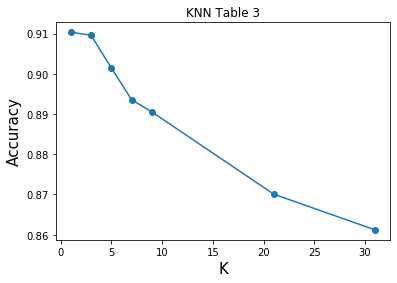

In [23]:
import matplotlib.pyplot as plt

plt.plot([1,3,5,7,9,21,31], accs, '-o')
plt.xlabel('K', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('KNN Table 3')